In [54]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/pablofonseca14/projetotcc/main/dataset/dataset_jogos.csv')
df.head()

,Div,Data,Casa,Visitante,Placar Casa,Placar Visitante,Resultado,Pontos Casa,Pontos Visitante,Soma Pontos Casa,Soma Pontos Visitante,Gols Casa,Gols Visitantes,Gols Conc. Casa,Gols Conc. Visitante,GMC,GMV,GCC,GCV,Total P. Casa,Total P. Visit.,Rodada,C1,V1,C2,V2,C3,V3,Casa Sequencia,Visitante Sequencia,Casa_AA,Visitante_AA,Dif Gols Casa,Dif Gols Visit,Dif Gols Time Casas,Dif Gols Time Visitante,Dif Pontos,Dif Posição
0,E0,10/08/2018,Man United,Leicester,2.0,1.0,C,3,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,-,-,-,-,-,-,---,---,2.0,9.0,0.0,0.0,0.0,0.0,0,-7.0
1,E0,11/08/2018,Bournemouth,Cardiff,2.0,0.0,C,3,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,-,-,-,-,-,-,---,---,12.0,17.0,0.0,0.0,0.0,0.0,0,-5.0
2,E0,11/08/2018,Fulham,Crystal Palace,0.0,2.0,V,0,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,-,-,-,-,-,-,---,---,17.0,11.0,0.0,0.0,0.0,0.0,0,6.0
3,E0,11/08/2018,Huddersfield,Chelsea,0.0,3.0,V,0,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,-,-,-,-,-,-,---,---,16.0,5.0,0.0,0.0,0.0,0.0,0,11.0
4,E0,11/08/2018,Newcastle,Tottenham,1.0,2.0,V,0,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,-,-,-,-,-,-,---,---,10.0,3.0,0.0,0.0,0.0,0.0,0,7.0


In [56]:
df = df.loc[df['Rodada'] > 3]
df.shape

(9800, 38)

In [57]:
df.drop(['Div', 'Data', 'Casa', 'Visitante', 'Placar Casa', 'Placar Visitante', 'Pontos Casa', 'Pontos Visitante'], axis= 1, inplace=True)

In [58]:
df['Resultado'].describe()

count     9800
unique       3
top          C
freq      4557
Name: Resultado, dtype: object

In [59]:
escala = ['Soma Pontos Casa', 'Soma Pontos Visitante', 'Gols Casa', 'Gols Visitantes', 'Gols Conc. Casa', 'Gols Conc. Visitante', 'GMC', 'GMV', 'GCC', 'GCV', 'Total P. Casa', 'Total P. Visit.', 'Dif Gols Casa', 'Dif Gols Visit', 'Dif Pontos', 'Dif Posição', 'Dif Gols Time Casas', 'Dif Gols Time Visitante']
df['Rodada'] = df['Rodada'].astype(float)

for colunas in escala:
    df[colunas] = df[colunas] / df['Rodada']

In [60]:
def only_hw(string):
    if string == 'C':
        return 1
    else:
        return 0
    
df['Resultado'] = df.Resultado.apply(only_hw)

In [61]:
x = df.drop(['Resultado', 'Rodada'],1)
y = df['Resultado']

In [62]:
from sklearn.preprocessing import scale

for col in escala:
    x[col] = scale(x[col])

In [63]:
x.head()

,Soma Pontos Casa,Soma Pontos Visitante,Gols Casa,Gols Visitantes,Gols Conc. Casa,Gols Conc. Visitante,GMC,GMV,GCC,GCV,Total P. Casa,Total P. Visit.,C1,V1,C2,V2,C3,V3,Casa Sequencia,Visitante Sequencia,Casa_AA,Visitante_AA,Dif Gols Casa,Dif Gols Visit,Dif Gols Time Casas,Dif Gols Time Visitante,Dif Pontos,Dif Posição
30,0.06005,-1.782482,0.281665,-1.067492,-0.036291,0.311637,-1.045755,0.046307,0.058424,1.404920,-1.055723,-1.092067,D,S,S,D,D,D,DSD,SDD,15.0,17.0,0.224648,-0.881106,-0.708400,-0.739351,1.296740,-0.756085
31,0.06005,0.906155,0.281665,-0.033816,-0.036291,-1.621199,1.738215,0.601567,-1.252276,-1.231474,1.984276,0.947629,S,E,S,S,S,S,SSS,ESS,5.0,12.0,0.224648,1.069423,1.812185,1.065546,-0.591401,-2.642962
32,-2.46170,-1.782482,-2.364360,-1.067492,-0.036291,-0.654781,-1.045755,-1.619473,-0.596926,-0.572376,-1.055723,-2.111915,D,D,D,D,S,E,DDS,DDE,11.0,17.0,-1.691583,-0.230930,-0.348316,-0.739351,-0.591401,-2.265587
33,0.06005,-1.782482,-0.600343,-1.067492,-1.157842,3.210891,0.624627,-2.174734,0.058424,2.723117,-0.042390,-2.111915,E,E,S,D,E,D,ESE,EDD,8.0,16.0,0.224648,-2.831634,0.371851,-2.905229,1.296740,-3.020337
34,0.06005,0.906155,-0.600343,-0.033816,-2.279394,-2.587616,0.067833,1.156827,-1.252276,-3.208770,0.464276,1.967477,S,S,S,S,D,S,SSD,SSS,9.0,4.0,0.863392,1.719599,0.731935,2.509464,-0.591401,1.885542


In [64]:
x.shape

(9800, 28)

In [65]:
x = pd.get_dummies(x, columns=['C1', 'C2', 'C3', 'V1', 'V2', 'V3', 'Casa Sequencia', 'Visitante Sequencia'], prefix= ['C1', 'C2', 'C3', 'V1', 'V2', 'V3', 'Casa Sequencia', 'Visitante Sequencia'])

In [69]:
x.head()

,Soma Pontos Casa,Soma Pontos Visitante,Gols Casa,Gols Visitantes,Gols Conc. Casa,Gols Conc. Visitante,GMC,GMV,GCC,GCV,Total P. Casa,Total P. Visit.,Casa_AA,Visitante_AA,Dif Gols Casa,Dif Gols Visit,Dif Gols Time Casas,Dif Gols Time Visitante,Dif Pontos,Dif Posição,C1_D,C1_E,C1_S,C2_D,C2_E,C2_S,C3_D,C3_E,C3_S,V1_D,V1_E,V1_S,V2_D,V2_E,V2_S,V3_D,V3_E,V3_S,Casa Sequencia_DDD,Casa Sequencia_DDE,...,Casa Sequencia_EES,Casa Sequencia_ESD,Casa Sequencia_ESE,Casa Sequencia_ESS,Casa Sequencia_SDD,Casa Sequencia_SDE,Casa Sequencia_SDS,Casa Sequencia_SED,Casa Sequencia_SEE,Casa Sequencia_SES,Casa Sequencia_SSD,Casa Sequencia_SSE,Casa Sequencia_SSS,Visitante Sequencia_DDD,Visitante Sequencia_DDE,Visitante Sequencia_DDS,Visitante Sequencia_DED,Visitante Sequencia_DEE,Visitante Sequencia_DES,Visitante Sequencia_DSD,Visitante Sequencia_DSE,Visitante Sequencia_DSS,Visitante Sequencia_EDD,Visitante Sequencia_EDE,Visitante Sequencia_EDS,Visitante Sequencia_EED,Visitante Sequencia_EEE,Visitante Sequencia_EES,Visitante Sequencia_ESD,Visitante Sequencia_ESE,Visitante Sequencia_ESS,Visitante Sequencia_SDD,Visitante Sequencia_SDE,Visitante Sequencia_SDS,Visitante Sequencia_SED,Visitante Sequencia_SEE,Visitante Sequencia_SES,Visitante Sequencia_SSD,Visitante Sequencia_SSE,Visitante Sequencia_SSS
30,0.06005,-1.782482,0.281665,-1.067492,-0.036291,0.311637,-1.045755,0.046307,0.058424,1.404920,-1.055723,-1.092067,15.0,17.0,0.224648,-0.881106,-0.708400,-0.739351,1.296740,-0.756085,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
31,0.06005,0.906155,0.281665,-0.033816,-0.036291,-1.621199,1.738215,0.601567,-1.252276,-1.231474,1.984276,0.947629,5.0,12.0,0.224648,1.069423,1.812185,1.065546,-0.591401,-2.642962,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
32,-2.46170,-1.782482,-2.364360,-1.067492,-0.036291,-0.654781,-1.045755,-1.619473,-0.596926,-0.572376,-1.055723,-2.111915,11.0,17.0,-1.691583,-0.230930,-0.348316,-0.739351,-0.591401,-2.265587,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33,0.06005,-1.782482,-0.600343,-1.067492,-1.157842,3.210891,0.624627,-2.174734,0.058424,2.723117,-0.042390,-2.111915,8.0,16.0,0.224648,-2.831634,0.371851,-2.905229,1.296740,-3.020337,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34,0.06005,0.906155,-0.600343,-0.033816,-2.279394,-2.587616,0.067833,1.156827,-1.252276,-3.208770,0.464276,1.967477,9.0,4.0,0.863392,1.719599,0.731935,2.509464,-0.591401,1.885542,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [68]:
x.shape

(9800, 92)

In [70]:
x.columns

Index(['Soma Pontos Casa', 'Soma Pontos Visitante', 'Gols Casa',
       'Gols Visitantes', 'Gols Conc. Casa', 'Gols Conc. Visitante', 'GMC',
       'GMV', 'GCC', 'GCV', 'Total P. Casa', 'Total P. Visit.', 'Casa_AA',
       'Visitante_AA', 'Dif Gols Casa', 'Dif Gols Visit',
       'Dif Gols Time Casas', 'Dif Gols Time Visitante', 'Dif Pontos',
       'Dif Posição', 'C1_D', 'C1_E', 'C1_S', 'C2_D', 'C2_E', 'C2_S', 'C3_D',
       'C3_E', 'C3_S', 'V1_D', 'V1_E', 'V1_S', 'V2_D', 'V2_E', 'V2_S', 'V3_D',
       'V3_E', 'V3_S', 'Casa Sequencia_DDD', 'Casa Sequencia_DDE',
       'Casa Sequencia_DDS', 'Casa Sequencia_DED', 'Casa Sequencia_DEE',
       'Casa Sequencia_DES', 'Casa Sequencia_DSD', 'Casa Sequencia_DSE',
       'Casa Sequencia_DSS', 'Casa Sequencia_EDD', 'Casa Sequencia_EDE',
       'Casa Sequencia_EDS', 'Casa Sequencia_EED', 'Casa Sequencia_EEE',
       'Casa Sequencia_EES', 'Casa Sequencia_ESD', 'Casa Sequencia_ESE',
       'Casa Sequencia_ESS', 'Casa Sequencia_SDD', 'Casa Sequencia

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 150,
                                                    random_state = 1,
                                                    stratify = y)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

In [74]:
y_pred = clf.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7133333333333334

In [76]:
y_test.value_counts()

0    80
1    70
Name: Resultado, dtype: int64

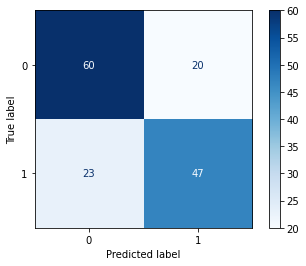

In [77]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, cmap='Blues') 

# SVC

In [45]:
from sklearn.svm import SVC
clf_svc = SVC(kernel = 'linear', random_state = 0)
clf_svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [46]:
y_pred2 = clf_svc.predict(X_test)

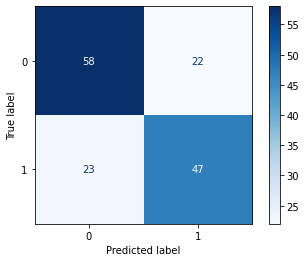

In [47]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_svc, X_test, y_test, cmap='Blues') 

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

0.7

# Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
clf_rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clf_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [50]:
y_pred3 = clf_rfc.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred3)

0.6733333333333333

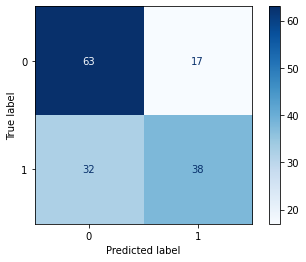

In [78]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_rfc, X_test, y_test, cmap='Blues') 